# Técnicas Multivariantes
## Jorge A. Balsells Orellana
### numero de identificación: 166315389-0101 -> 26632538

# Importando librerías

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
import numpy as np
import pandas as pd

In [2]:
data = sk.datasets.make_regression(
    n_samples=200+10*2, 
    n_features=10+6+6, 
    n_informative=10+6, 
    n_targets=1, 
    noise=10*3,
    shuffle=False, 
    bias=2, 
    random_state=None,

    effective_rank=None, 
    tail_strength=0.5,  
    coef=False
)

In [3]:
data_fr = pd.DataFrame(data[0])
data_fr.columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20','c21']
print(data_fr)

           c0        c1        c2        c3        c4        c5        c6  \
0   -1.200619  0.363886  0.527277  1.776005  1.562085 -0.998717 -1.445892   
1   -0.370290 -0.721044 -0.004600  1.988354 -1.187087  1.929338  1.106362   
2   -0.083060 -0.848515 -0.666145  2.155664  1.217626  0.442125 -0.066560   
3    0.547946  0.137935  0.803414  1.647611 -0.406032 -2.838325  0.998711   
4   -0.478050  0.939166  1.590225 -2.444970 -1.545710  0.086851 -0.821011   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.076349 -0.294829  0.649279 -1.841271  0.515866 -0.785015  0.919299   
216 -1.447078  0.530184  0.876954 -0.646612  0.652381 -0.302676 -1.117376   
217 -0.197006 -2.568405  0.944425  1.424370  1.913104  0.213528  0.841183   
218  0.148215  1.986257  1.706012  1.239836 -0.204384 -1.498575  1.656196   
219  0.101630  1.352317  0.540504  1.114844 -0.140460 -1.433073  1.174183   

           c7        c8        c9  ...       c12       c13       c14  \
0  

In [4]:
train_set, test_set, y_train, y_test = train_test_split(data_fr, data[1], test_size=0.09, random_state=42)

print(f"tamaño entrenamiento features {train_set.shape}")
print(f"tamaño test features {test_set.shape}")
print(f"tamaño entrenamiento respuesta {y_train.shape}")
print(f"tamaño test respuesta {y_test.shape}")

tamaño entrenamiento features (200, 22)
tamaño test features (20, 22)
tamaño entrenamiento respuesta (200,)
tamaño test respuesta (20,)


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 189 to 102
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c0      200 non-null    float64
 1   c1      200 non-null    float64
 2   c2      200 non-null    float64
 3   c3      200 non-null    float64
 4   c4      200 non-null    float64
 5   c5      200 non-null    float64
 6   c6      200 non-null    float64
 7   c7      200 non-null    float64
 8   c8      200 non-null    float64
 9   c9      200 non-null    float64
 10  c10     200 non-null    float64
 11  c11     200 non-null    float64
 12  c12     200 non-null    float64
 13  c13     200 non-null    float64
 14  c14     200 non-null    float64
 15  c15     200 non-null    float64
 16  c16     200 non-null    float64
 17  c17     200 non-null    float64
 18  c18     200 non-null    float64
 19  c19     200 non-null    float64
 20  c20     200 non-null    float64
 21  c21     200 non-null    float64
dtype

In [6]:
train_set.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.061775,0.068480,-0.029100,-0.079289,0.024882,0.058193,-0.061592,0.020946,0.024503,-0.093435,...,-0.072567,0.018591,0.064096,-0.042001,0.051858,-0.066966,-0.010057,-0.048863,0.036259,-0.090818
std,0.951104,0.859848,0.935541,1.045438,1.029154,0.990542,0.898575,1.046160,0.983612,0.951497,...,1.004430,1.008430,0.987427,0.961506,1.068868,0.910952,1.071814,0.893632,0.995174,0.973091
min,-2.257323,-2.568405,-2.482018,-2.660958,-3.065924,-2.838325,-2.377142,-2.372431,-2.582735,-2.757625,...,-2.571439,-2.511117,-2.603918,-2.434906,-3.314557,-2.959647,-2.939178,-2.101485,-2.593781,-2.862278
25%,-0.533241,-0.546414,-0.606245,-0.740814,-0.688340,-0.597589,-0.645426,-0.744354,-0.657205,-0.675275,...,-0.668238,-0.699544,-0.597825,-0.652038,-0.604215,-0.633148,-0.712945,-0.590866,-0.631175,-0.696132
50%,0.102723,0.133160,-0.073856,-0.105574,0.089689,0.072999,-0.062011,-0.085418,0.019527,-0.079579,...,-0.108140,0.082356,0.013870,-0.005546,0.034842,-0.064684,0.023465,-0.114663,0.061491,-0.049538
75%,0.744515,0.681227,0.627146,0.691111,0.691641,0.776711,0.584005,0.664773,0.690342,0.540392,...,0.602127,0.686061,0.741414,0.602292,0.708587,0.621575,0.614373,0.520805,0.803799,0.533666
max,2.827125,2.731737,2.353466,2.578257,2.533175,2.936126,2.180832,3.437404,2.713194,2.434474,...,3.605012,3.105076,2.967300,2.438551,2.630969,2.541617,2.675915,2.559372,2.276325,2.769567


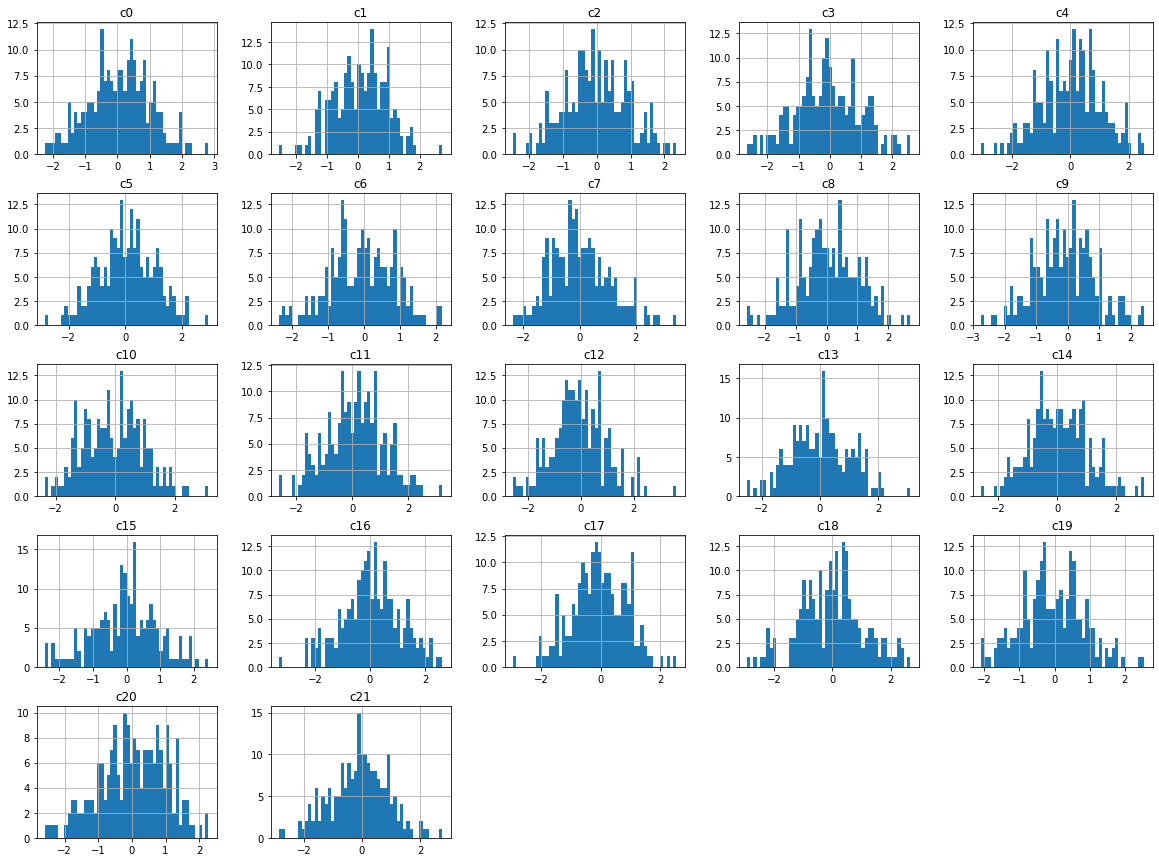

In [7]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

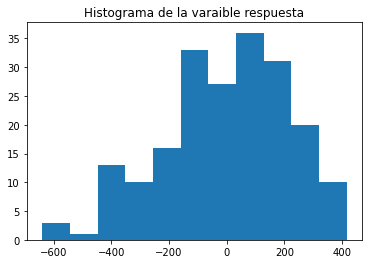

In [8]:
plt.hist(y_train, bins='auto')
plt.title("Histograma de la varaible respuesta")
plt.show()

In [9]:
train_data = train_set.copy()
train_data['y'] = y_train
mat_corr = train_data.corr()
mat_corr['y']

c0     0.364644
c1     0.250325
c2    -0.107469
c3     0.424363
c4    -0.037278
c5     0.351267
c6     0.322329
c7     0.231789
c8    -0.018025
c9     0.251766
c10    0.130534
c11    0.168569
c12    0.118699
c13    0.161102
c14    0.437383
c15    0.233611
c16    0.062251
c17   -0.133591
c18   -0.017822
c19    0.024090
c20   -0.070258
c21    0.031895
y      1.000000
Name: y, dtype: float64

In [11]:
train_set = sm.add_constant(train_set, prepend=True)
model1 = sm.OLS(endog=y_train, exog=train_set)
model1 = model1.fit()

In [12]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     430.1
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.78e-141
Time:                        01:34:36   Log-Likelihood:                -959.93
No. Observations:                 200   AIC:                             1966.
Df Residuals:                     177   BIC:                             2042.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2033      2.326     -0.087      0.9

In [13]:
train_set.drop('c19', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [14]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     452.9
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.35e-142
Time:                        01:34:53   Log-Likelihood:                -959.98
No. Observations:                 200   AIC:                             1964.
Df Residuals:                     178   BIC:                             2037.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2604      2.313     -0.113      0.9

In [15]:
train_set.drop('c21', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [16]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     478.0
Date:                Mon, 17 May 2021   Prob (F-statistic):          6.39e-144
Time:                        01:35:05   Log-Likelihood:                -960.03
No. Observations:                 200   AIC:                             1962.
Df Residuals:                     179   BIC:                             2031.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1809      2.293     -0.079      0.9

In [17]:
train_set.drop('c18', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [18]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     503.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          4.24e-145
Time:                        01:35:19   Log-Likelihood:                -960.50
No. Observations:                 200   AIC:                             1961.
Df Residuals:                     180   BIC:                             2027.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3254      2.286     -0.142      0.8

In [19]:
train_set.drop('c17', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [20]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     531.7
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.89e-146
Time:                        01:35:32   Log-Likelihood:                -961.02
No. Observations:                 200   AIC:                             1960.
Df Residuals:                     181   BIC:                             2023.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5507      2.274     -0.242      0.8

In [21]:
train_set.drop('c20', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [22]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     561.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.34e-147
Time:                        01:35:44   Log-Likelihood:                -961.76
No. Observations:                 200   AIC:                             1960.
Df Residuals:                     182   BIC:                             2019.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6684      2.274     -0.294      0.7

In [23]:
train_set.drop('c2', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [24]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     595.1
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.01e-148
Time:                        01:35:58   Log-Likelihood:                -962.59
No. Observations:                 200   AIC:                             1959.
Df Residuals:                     183   BIC:                             2015.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6630      2.277     -0.291      0.7

In [26]:
train_set.drop('c16', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()

In [27]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     632.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.75e-149
Time:                        01:36:18   Log-Likelihood:                -963.47
No. Observations:                 200   AIC:                             1959.
Df Residuals:                     184   BIC:                             2012.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4821      2.276     -0.212      0.8

In [28]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

In [29]:
parameters = {
    'alpha':np.arange(0.005,0.9,0.01),
    'l1_ratio':np.arange(0.1,0.5,0.01)
}
print(parameters)

{'alpha': array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895]), 'l1_ratio': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])}


In [30]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
print(cv)

RepeatedKFold(n_repeats=2, n_splits=5, random_state=42)


In [31]:
elasticNet = ElasticNet()
Srch = GridSearchCV(elasticNet, parameters, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
result = Srch.fit(train_set,y_train)

In [32]:
print(result)
print(result.best_score_)
print(result.best_params_)

best_elastic = result.best_estimator_
print(best_elastic)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.36...
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895]),
                         'l1_ratio': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])},
             scoring='neg_mean_squared_error')
-1047.2692562635616
{'alpha': 0.005, 'l1_ratio': 0.48

# Comprobación de error cuadrático medio

## Modelo 1

In [33]:
test_set = sm.add_constant(test_set, prepend=True)
y_predict_model_1 = model1.predict(test_set)
Mean_Sq_Error = mean_squared_error(y_predict_model_1, y_test)
print(Mean_Sq_Error)

750.5664746002329


## Modelo 2

In [34]:
test_set.drop(columns=['c2','c16','c17','c18','c19','c20','c21'],inplace=True)
y_predict_model_2 = model2.predict(test_set)

In [36]:
Mean_Sq_Error_2 = mean_squared_error(y_predict_model_2, y_test)
print(Mean_Sq_Error_2)

803.4930275424474


## Modelo 3

In [37]:
y_predict_model_3 = best_elastic.predict(test_set)

In [39]:
Mean_Sq_Error_3 = mean_squared_error(y_predict_model_3, y_test)
print(Mean_Sq_Error_3)

796.5599792561268


## Resultados de predicciones

In [48]:
resultados_dict ={
    'y_true' : y_test,
    'pred_modelo_1': y_predict_model_1,
    'pred_modelo_2': y_predict_model_2,
    'pred_modelo_3': y_predict_model_3,
}

resultados_df = pd.DataFrame(resultados_dict)

resultados_df

,y_true,pred_modelo_1,pred_modelo_2,pred_modelo_3
132,333.020602,337.500686,337.793499,336.921428
148,48.171506,70.577423,68.063862,67.811020
93,-2.486599,6.473093,12.315322,12.395744
180,117.144811,98.533880,100.483649,100.065695
15,219.582261,179.860269,178.777864,178.464100
115,118.285486,93.841975,92.082986,91.826115
172,35.675697,92.450567,99.545055,99.347175
209,-165.223912,-159.573230,-164.636243,-164.098968
75,-102.658248,-111.493527,-112.536782,-112.142209
142,78.210423,44.007023,51.301069,51.217902
